In [ ]:
# 1. Read spec closely to understand which charts to make
# 2. Make Tidy Charts
# 3. Add Analysis
# 4. Submit

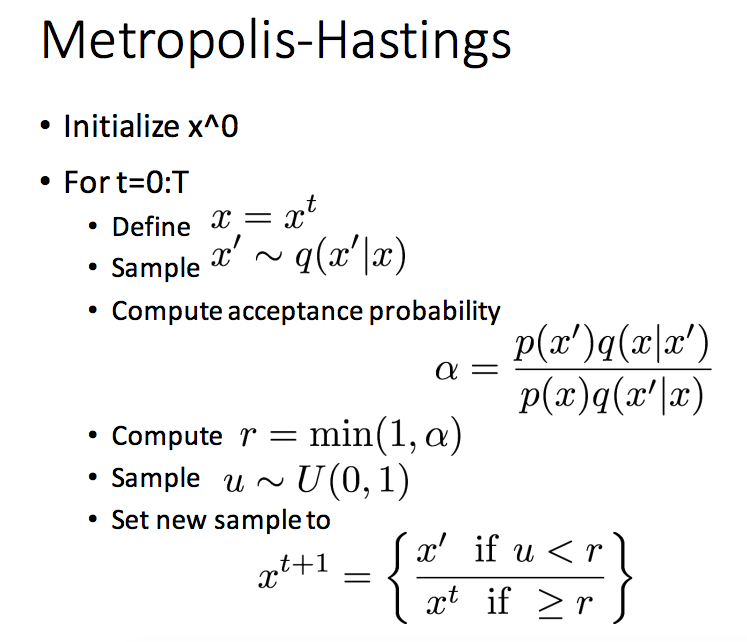

In [22]:
from IPython.display import Image
Image(filename='1.png')

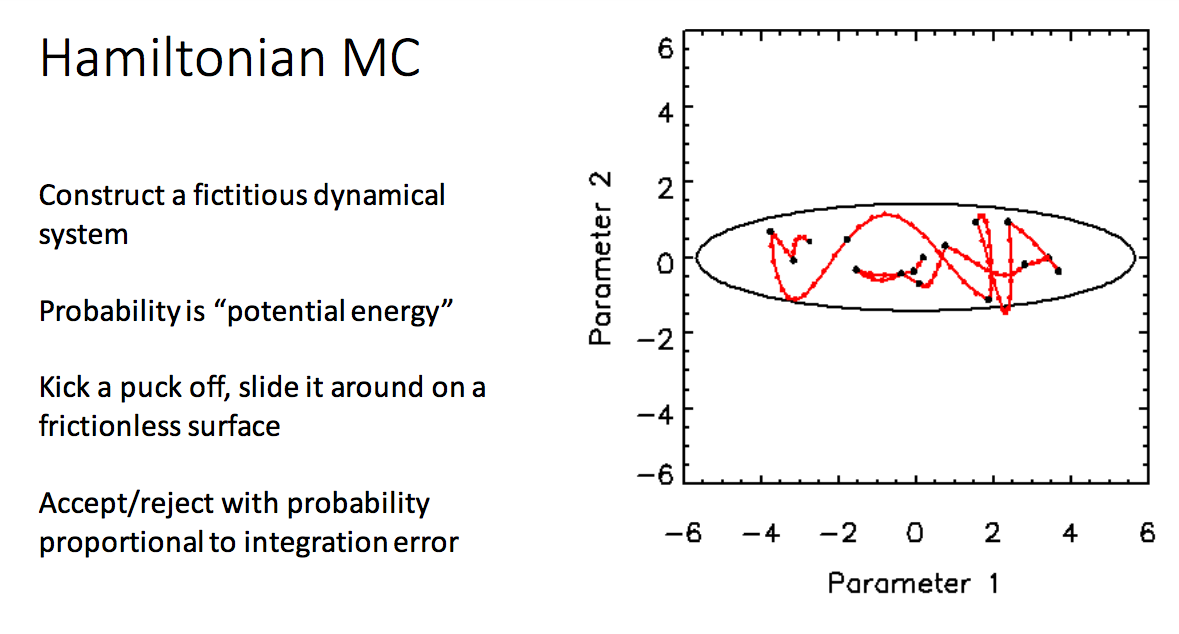

In [23]:
Image(filename='hamiltonian.png')

#Metropolis Hastings Algorithm

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn
import numpy as np

In [54]:
def p( x, t=1.0 ):
    return np.exp( -10*t*((x-2)**2) ) + 0.3*np.exp( -0.5*10*t*((x+1)**2) )

In [55]:
#Step2 : Compute xprime
def q(x,s): 
    return np.random.normal(x, s)

In [56]:
def MetropolisHastings(sigma= .1, iters = 10000):
    x = 0
    xs = []
    acceptanceCounter = 0

    for i in range (0,iters,1):
        traceNumber = 0

        #Step1 : Set X
        
        #Step2 : Compue Xprime
        xPrime = q(x,sigma)

        #Step3 : Compute a 
        alpha =  p(xPrime)*q(xPrime,sigma) / ((p(x)) * q(x,sigma)) #  p(x) / p(xPrime)

        #Step4 : Compute r
        r = min(1, alpha)

        #Step5 : Compute u 
        u = np.random.rand()

        useXPrime = False

        #Step6 : Compute
        if (u < r):
            x = xPrime
            acceptanceCounter += 1

        xs.append(x)
    print "Acceptance: ", acceptanceCounter, " / ", iters  
    return xs

#Visualizing Metropolis Hastings

In [57]:
xcoords = np.linspace(-3, 3)
ycoords = []
for i, x in enumerate(xcoords):
    ycoords.append(p(xcoords[i]))

def visualize(xs, chartTitle = "Proposal = 1.0"):
    plt.figure(figsize=(15,8))
    plt.hist(xs,bins=50, normed = True)
    plt.plot(xcoords,ycoords,color="green")
    plt.title(chartTitle)
    plt.show()
        

In [58]:
def visualizeFirstNSteps(listOfListofSteps, colors = ['red', 'blue', 'green'], n=1000, chartTitle = "Proposal = 1.0"):
    tarray = [i for i in xrange(n + 1)]
    plt.figure(figsize=(15,8))
    #colors = ['red', 'blue', 'green']
    for i in range(0,len(listOfListofSteps), 1):
        plt.plot(tarray[0:n], listOfListofSteps[i][0:n], color = colors[i])
    
    plt.ylabel("State")
    plt.title(chartTitle)
    plt.tight_layout()
    plt.show()

#Metropolis Hastings With Sigma = .1

Acceptance:  8786  /  10000
Acceptance:  8816  /  10000
Acceptance:  8817  /  10000


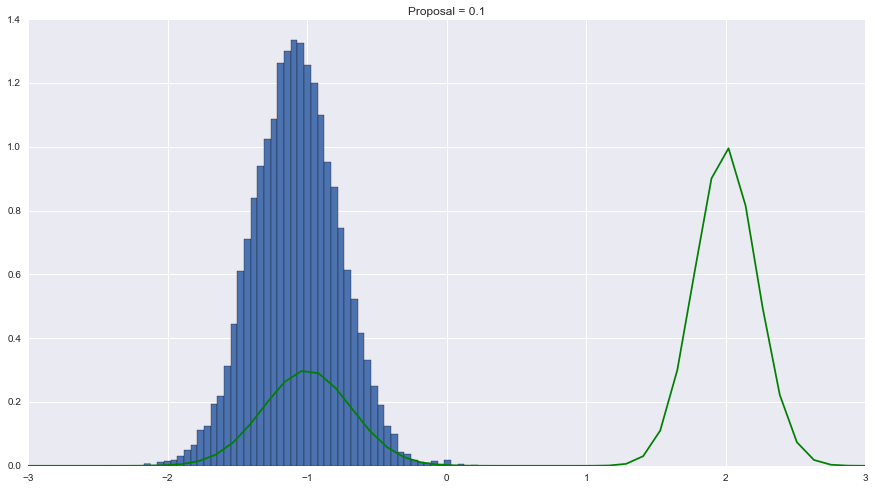

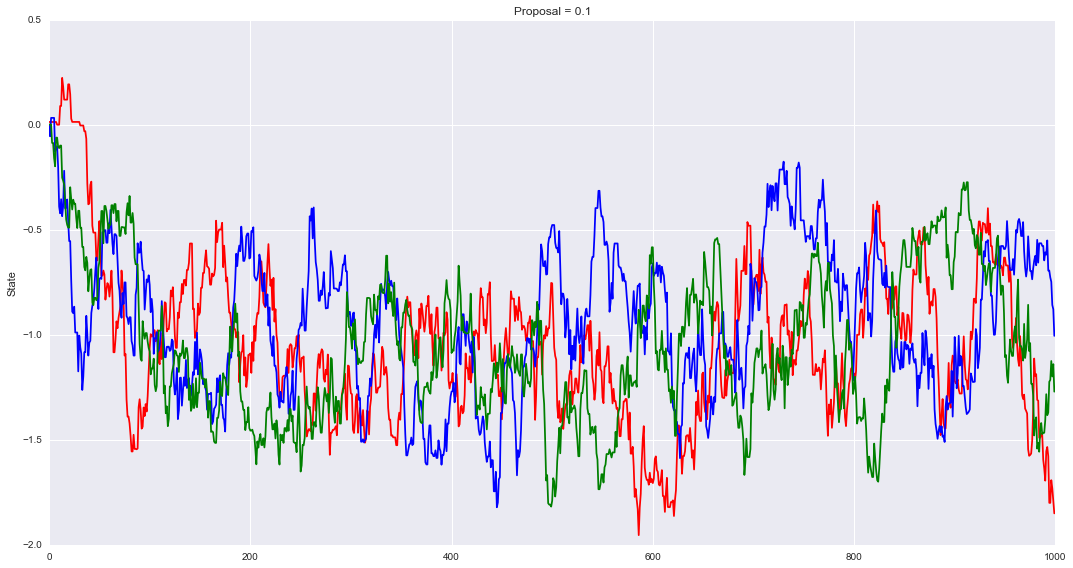

In [59]:
# TESTING WITH SIGMA = .1
listOfPoint1s = []
xsSigmaPoint1A = MetropolisHastings()
xsSigmaPoint1B = MetropolisHastings()
xsSigmaPoint1C = MetropolisHastings()
masterListPoint1 = xsSigmaPoint1A + xsSigmaPoint1B + xsSigmaPoint1C

listOfPoint1s.extend([xsSigmaPoint1A,xsSigmaPoint1B,xsSigmaPoint1C])

visualize(masterListPoint1, chartTitle = "Proposal = 0.1")
visualizeFirstNSteps(listOfPoint1s, chartTitle = "Proposal = 0.1")



#Metropolis Hastings With Sigma = 1.0

Acceptance:  2595  /  10000
Acceptance:  2502  /  10000
Acceptance:  2619  /  10000


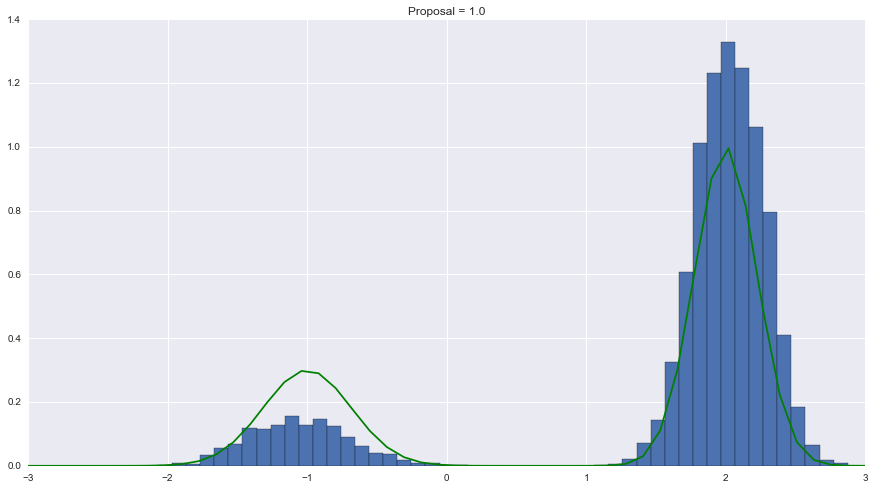

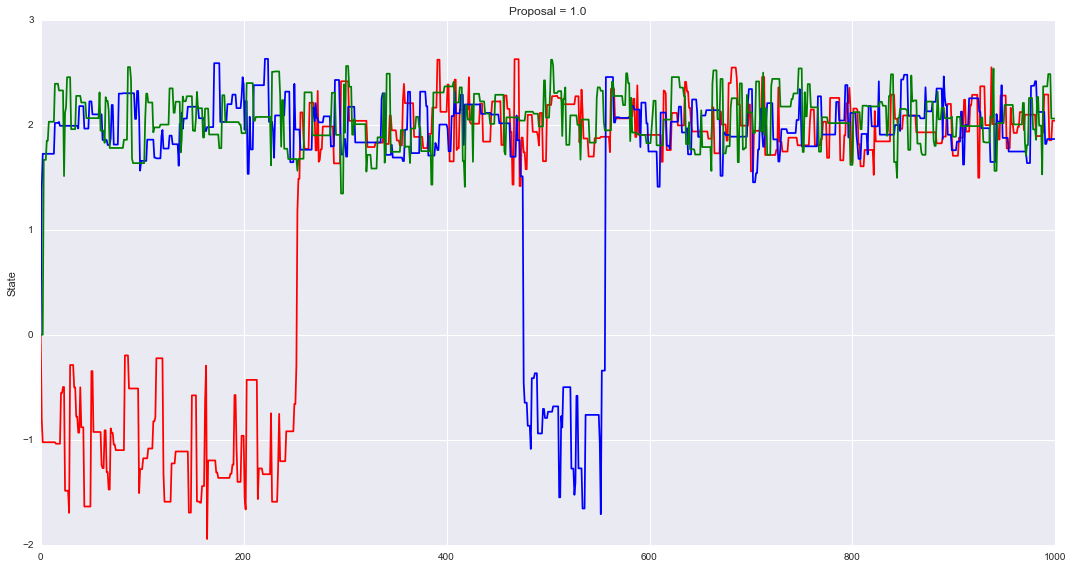

In [61]:
# TESTING WITH SIGMA = 1
listOfPoint1s = []
xsSigma1A = MetropolisHastings(sigma = 1.0)
xsSigma1B = MetropolisHastings(sigma = 1.0)
xsSigma1C = MetropolisHastings(sigma = 1.0)
masterList1 = xsSigma1A + xsSigma1B + xsSigma1C
listOfPoint1s.extend([xsSigma1A,xsSigma1B,xsSigma1C])

visualize(masterList1,chartTitle = "Proposal = 1.0")
visualizeFirstNSteps(listOfPoint1s, chartTitle = "Proposal = 1.0")

#Metropolis Hastings With Sigma = 10.0

Acceptance:  331  /  10000
Acceptance:  330  /  10000
Acceptance:  315  /  10000


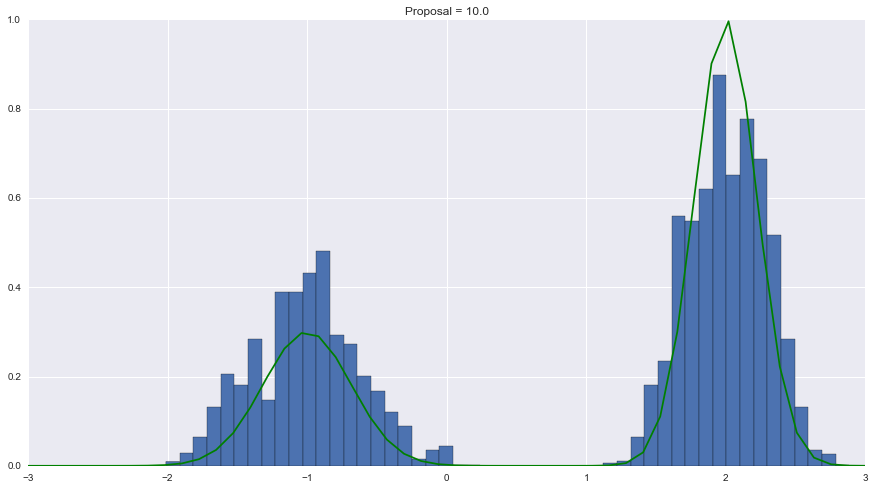

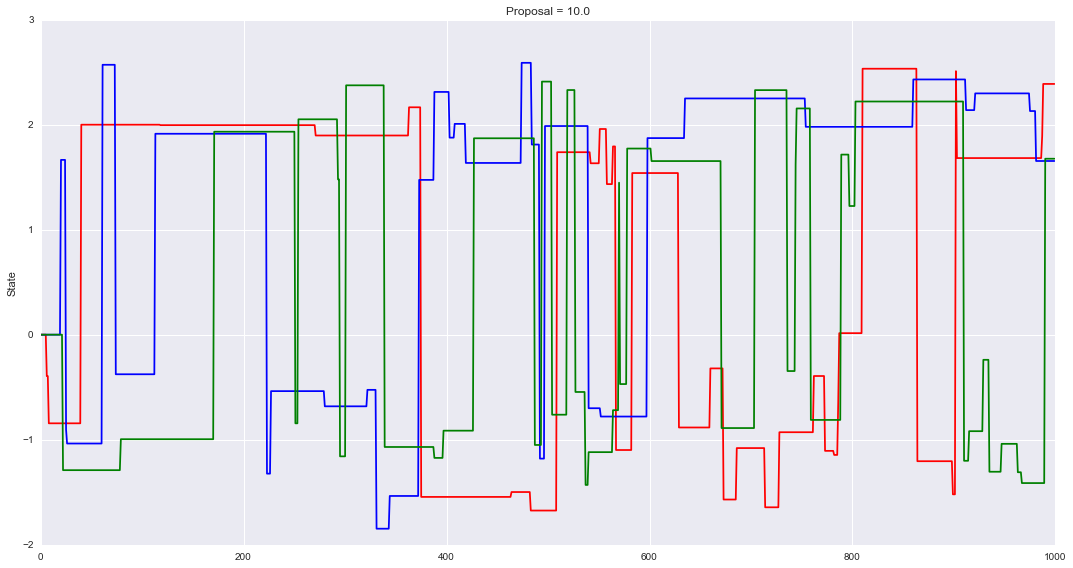

In [62]:
# TESTING WITH SIGMA = 10
listOfPoint10s = []
xsSigma10A = MetropolisHastings(sigma = 10.0)
xsSigma10B = MetropolisHastings(sigma = 10.0)
xsSigma10C = MetropolisHastings(sigma = 10.0)
masterList10 = xsSigma10A + xsSigma10B + xsSigma10C
listOfPoint10s.extend([xsSigma10A,xsSigma10B,xsSigma10C])

visualize(masterList10, chartTitle = "Proposal = 10.0")
visualizeFirstNSteps(listOfPoint10s, chartTitle = "Proposal = 10.0")


#Hamiltonian MCMC

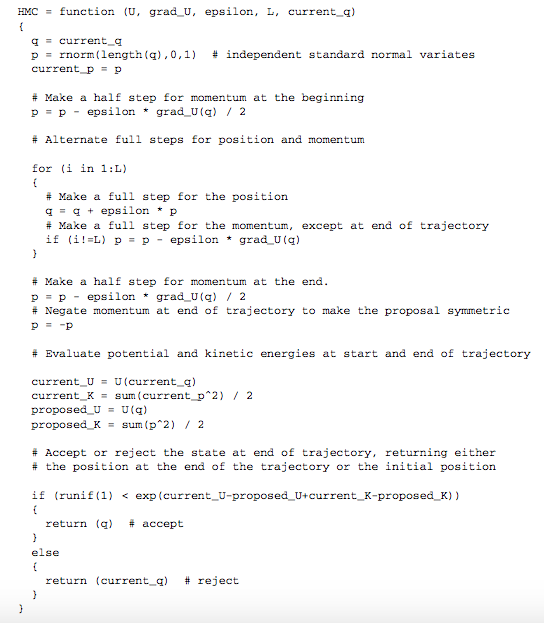

In [45]:
#for hamiltonian you do the same plots but you don't need to do it 3 times because sigma doesn't matter
Image(filename='ham.png')

In [98]:
from math import exp
from autograd import grad
import autograd.numpy as np

In [99]:
def U(q):
    return -np.log(p(q))

In [100]:
#TWEAK EPSILON, L, SCALE

#Hamiltonian MCMC
def HMC(U, grad_U, current_q, epsilon=.65, L=1):
    q = current_q
    p = np.random.normal(scale=1.4)
    current_p = p
    
    #Make a half step for momentum at the beginning
    p = p - epsilon * grad_U(q) / 2.0

    #Alternate full steps for position and momentum
    
    for i in range(0,L,1):
        # Make a full step for the position
        q = q + epsilon * p
        #Make a full step for the momentum, except at the end of trajectory
        if (i != L ):
            p = p - epsilon * grad_U(q)
            
    # Make a half step for momentum at the end
    p = p - epsilon * grad_U(q) / 2.0
    # Negate momentum at end of trajectory to make the proposal symmetric
    p = -p
    
    #Evaluate potential and kinetic energies at start and end of trajectory
    
    current_U = U(current_q)
    current_K = np.sum(current_p * current_p) / 2
    proposed_U = U(q)
    proposed_K = np.sum(p * p) / 2
    
    # Accept or reject the state at end of trajectory, returning either
    # the position at the end of the trajectory or the initial position
    if ( np.random.uniform() < np.exp(current_U - proposed_U + current_K - proposed_K)):
        return (q) #accept
    else:
        return (current_q) #reject 

In [101]:
grad_U = grad(U)
grad_p = grad( p )

qsTrace1 = []
qsTrace2 = []
qsTrace3 = []

q = 0
counter = 0
iters = 10000
for i in range (0,iters,1):
    q = HMC(U, grad_U, q)
    qsTrace1.append(q)
    counter = counter if qsTrace1[i] == qsTrace1[i-1] else counter + 1
print "Acceptance: ", counter, " / ", iters
    
counter = 0
q = 0
for i in range (0,iters,1):
    q = HMC(U, grad_U, q)
    qsTrace2.append(q)  
    counter = counter if qsTrace1[i] == qsTrace1[i-1] else counter + 1

print "Acceptance: ", counter, " / ", iters


counter = 0
q = 0
for i in range (0,iters,1):
    q = HMC(U, grad_U, q)
    qsTrace3.append(q) 
    counter = counter if qsTrace1[i] == qsTrace1[i-1] else counter + 1
print "Acceptance: ", counter, " / ", iters



Acceptance:  192  /  10000
Acceptance:  193  /  10000
Acceptance:  193  /  10000


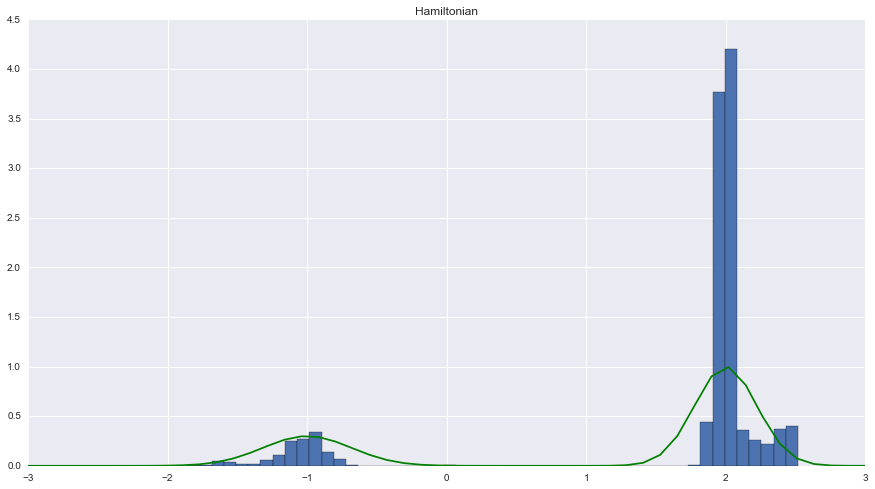

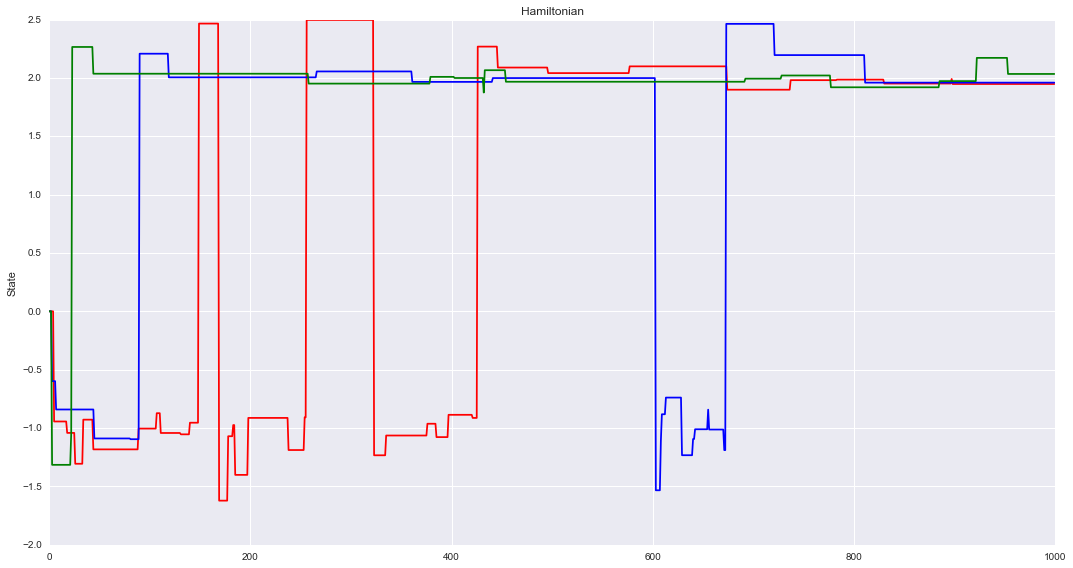

In [102]:
listOfTraces = []
listOfTraces.append(qsTrace1)
listOfTraces.append(qsTrace2)
listOfTraces.append(qsTrace3)

masterHamiltonianListOfStates = qsTrace1 + qsTrace2 + qsTrace3

visualize(masterHamiltonianListOfStates, chartTitle = "Hamiltonian")
visualizeFirstNSteps([qsTrace1, qsTrace2, qsTrace3], chartTitle = "Hamiltonian")
#visualize(qsTrace2)
#visualize(qsTrace3)

#Observations

###1. What was the acceptance rate of each algorithm? (ie, what percentage of proposals were accepted)

Metropolis Hastings (Sigma =   .1): .87
Metropolis Hastings (Sigma =  1.0): .25
Metropolis Hastings (Sigma = 10.0): .03

Hamiltonian: .014



###2. Why don't some inference algorithms explore both modes of the density?

On metropolis hastings not all modes are explored because the random variable variance is not high enough for the state to jump over to the other mode of the density.  You can't explore the modes enough if they are too far apart, or if one mode is too deep, and the variance doesn't allow you to get over to the other one.


###3. Why do some algorithms stay in the same state repeatedly? Is this good or bad?

When I ran MCMC the algorithm often stayed in the same state repeatedly. This is not
necessarily good or bad. What matters most is how closely the distribution fits the curve. 
The algorithm that did this best for me was the Metropolis-Hastings algorithm with sigma 1.0. This matched the expected distribution the best. The acceptance rate was about 25%. This jumping from one state to the other depends a lot upon the sigma.  Staying in one state for too long could prevent an algorithm from exploring more of the probable states, but jumping around too much could also decrease the accuracy of the distribution. In a nutshell, it's not bad or good to stay in one spot, it just depends on how closely it matches the distribution and it may be that the distribution warrents staying in one single place. In order to achieve the best accuracy possible the variables need to be modified and tested to find the best match. 


###4. What were the best values for the variance of the momentum variables and the timestep you found? How did you know that they were good?

The way I found the best variables was by trial and error. I recorded some of my testing in this chart below. I evaluated how "good" it was by how closely it matched the distribution.

dec = "decent"

EPSILON :  .65, 3.65, .15, .65, .55, .65, .65, .65

L       :  1  , 1   , 1  , 1  , 1  ,   5,   3,   2

SCALE   :  1.4, 1.4 , 1.4, 3.4, 2.0, 1.4, 1.4, 1.4

RESULTS : good, bad , bad, dec, dec, good,dec, bad,


BEST: 
EPSILON : .65
L       : 1  
SCALE   : 1.4
